# 1. EDA

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from ydata_profiling import ProfileReport
from scipy import stats
from scipy import special

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

df_train = pd.read_csv("train_test_submission/train.csv")
df_train_Id = df_train["Id"]
df_train = df_train.drop("Id", axis=1)

df_test = pd.read_csv("train_test_submission/test.csv")
df_test_Id = df_test["Id"]
df_test = df_test.drop("Id", axis=1)

df_all_data = pd.concat([df_train, df_test])

print(f"df_train.shape: {df_train.shape}")
display(df_train.head(5))
print(f"df_train.shape: {df_test.shape}")
display(df_test.head(5))

print("-" * 10, "df_train.info()", "-" * 10)
print(df_train.info())
print("\n", "-" * 10, "df_test.info()", "-" * 10)
print(df_test.info())



# # ydata_profilingを使う場合。時間かかるので注意

# if not os.path.exists("ydata_profiling"):
#     os.makedirs("ydata_profiling")

# profile = ProfileReport(df_all_data, minimal=True)
# profile.to_file("ydata_profiling/kaggle_houseprices_minimal.html")

# # profile = ProfileReport(df_all_data, minimal=False)
# # profile.to_file("ydata_profiling/kaggle_houseprices.html")

df_train.shape: (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


df_train.shape: (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


---------- df_train.info() ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond   

In [31]:
print("-" * 10, "df_train.columns", "-" * 10)
print(df_train.columns)

---------- df_train.columns ----------
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',

---------- df_train["SalePrice"].describe() ----------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


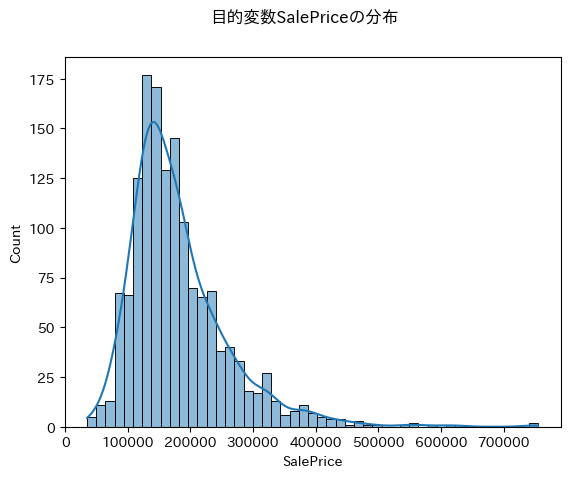

In [32]:
print("-" * 10, 'df_train["SalePrice"].describe()', "-" * 10)
print(df_train["SalePrice"].describe())

# SalePriceの分布
sns.histplot(df_train["SalePrice"], kde=True)
plt.suptitle("目的変数SalePriceの分布")
plt.show()

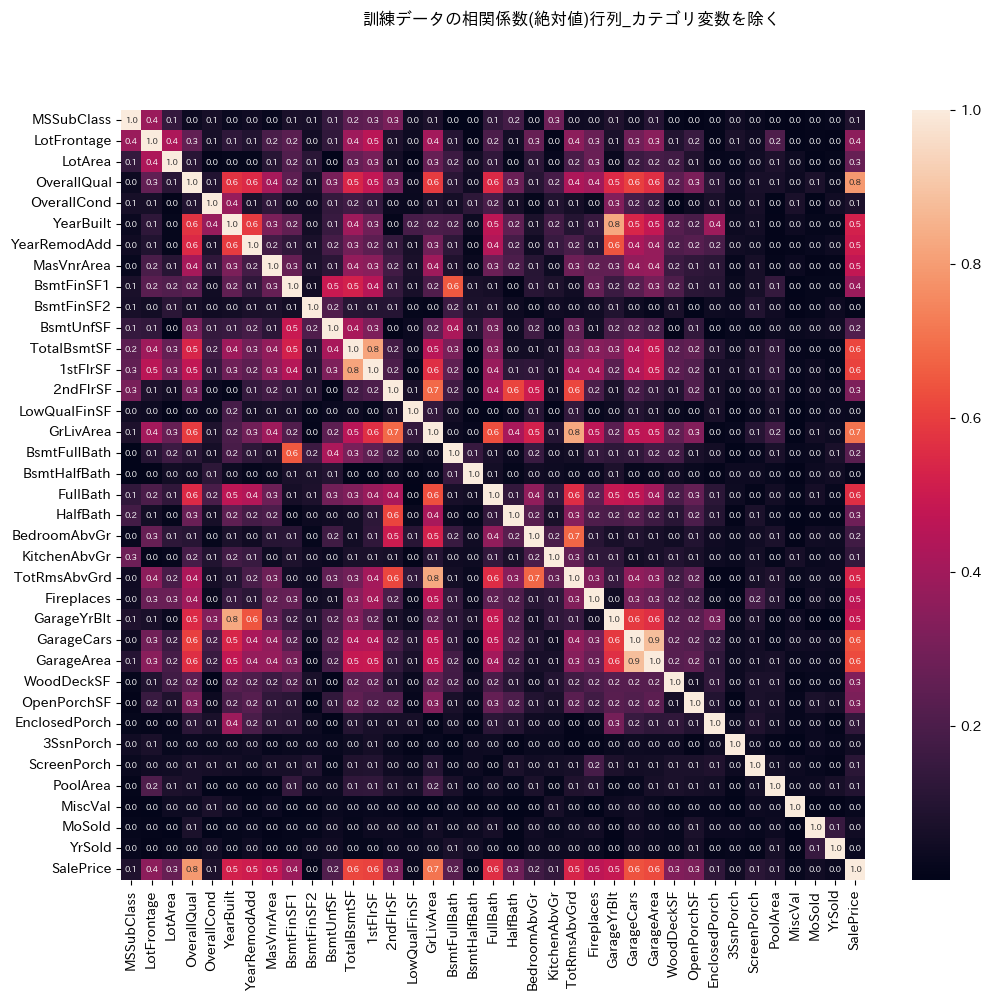

In [33]:
corr_matrix = df_train.corr(numeric_only=True)
"""
    訓練データdf_trainの相関係数行列
    corr_matrix = df_train.corr(numeric_only=True)
"""

plt.figure(figsize=(12, 10))
sns.heatmap(abs(corr_matrix), annot=True, fmt=".1f", annot_kws={"fontsize": 6})

plt.suptitle("訓練データの相関係数(絶対値)行列_カテゴリ変数を除く")
plt.show()

In [34]:
# plotly版。インデックス番号が一目で確認できる

import plotly.express as px
import plotly.subplots as sp

threshold = 0.6
high_corr_cols = (
    corr_matrix["SalePrice"][abs(corr_matrix["SalePrice"]) >= threshold]
    .sort_values(ascending=False)
    .index
).drop("SalePrice")

# プロットのサイズを指定
num_cols = len(high_corr_cols)
rows = num_cols // 3 + 1  # 行数
cols = 3  # 列数

# サブプロットの作成
fig = sp.make_subplots(
    rows=rows, 
    cols=cols, 
    subplot_titles=[f"{col} vs SalePrice （相関係数{corr_matrix["SalePrice"][col]:.3f}）" for col in high_corr_cols],
    horizontal_spacing=0.05,
    vertical_spacing=0.1,
    )

# high_corr_colsにある特徴量ごとに散布図を描く
for i, col in enumerate(high_corr_cols):
    row = i // cols + 1
    col_num = i % cols + 1
    scatter = px.scatter(df_train, x=col, y="SalePrice", opacity=0.3, hover_data=[df_train.index])
    for trace in scatter.data:
        fig.add_trace(trace, row=row, col=col_num)
    fig.update_annotations()

# グラフのタイトルを設定
fig.update_layout(
    title_text=f"SalePriceとの相関係数の絶対値が{threshold}以上の特徴量についての散布図",
    showlegend=False,
    height=400 * rows,
    width=1200,
)

# グラフの表示
fig.show()

# レイアウト調節 https://data-analytics.fun/2021/06/19/plotly-subplots/

# 2. 前処理

In [35]:
# 外れ値処理(訓練データ)
# 外れ値のインデックス番号は、plotlyで描いたグラフから得た
df_train_befdrop = df_train
df_train = df_train.drop(df_train.index[[523, 1298]])

fig = px.scatter(
    df_train, x="GrLivArea", y="SalePrice",
    opacity=0.3,
    hover_data=[df_train.index]
)

fig.update_layout(
    title_text="SalePrice vs GrLivArea. 外れ値処理後",
    showlegend=False,
    height=500,
    width=600
)

# グラフの表示
fig.show()

In [36]:
# 欠損値処理(訓練データ、テストデータ)
df_all_data = pd.concat([df_train, df_test])

df_missing_values_count = df_all_data.isna().sum()
df_missing_values_table = pd.DataFrame(
    {
        "Missing_count": df_missing_values_count,
        "Percent (%)": round(df_missing_values_count / len(df_all_data) * 100, 2)
    }
).sort_values("Missing_count", ascending=False)

# chatGPTに作ってもらった各特徴量の説明をまとめたcsvを読み込み、欠損値に関する表と結合
df_data_description = pd.read_csv("data_description/data_descripsion_simple_jp.csv", index_col=0)
df_missing_value_description = pd.concat([df_missing_values_table, df_data_description], axis=1)

# csvに出力。これとydata_profilingのレポートを眺めながら各欠損値をどう処理するか考える。
if not os.path.exists("missing_value"):
    os.makedirs("missing_value")
df_missing_value_description.to_csv(
    "missing_value/missing_value_processing.csv", encoding="utf-8_sig"
)

display(df_missing_value_description.head(10))

,Missing_count,Percent (%),説明
PoolQC,2908.0,99.69,プールの品質
MiscFeature,2812.0,96.40,その他の特別な機能
Alley,2719.0,93.21,路地アクセスの種類
Fence,2346.0,80.43,フェンスの品質
MasVnrType,1766.0,60.54,石造りの外壁の種類
SalePrice,1459.0,50.02,物件の販売価格（ドル）。予測対象の変数。
FireplaceQu,1420.0,48.68,暖炉の品質
LotFrontage,486.0,16.66,物件に接続する道路の線形フィート数
GarageFinish,159.0,5.45,ガレージの内装仕上げ
GarageQual,159.0,5.45,ガレージの品質


In [37]:
# LotFrontageの欠損値をどう処理するかが難しい。一度、ここが欠損値になっているデータだけ取り出してみる

df_naLot = df_all_data[df_all_data["LotFrontage"].isna()]

# ydata_profilingを使ってレポート作成

if not os.path.exists("ydata_profiling"):
    os.makedirs("ydata_profiling")

profile = ProfileReport(df_all_data, minimal=True)
profile.to_file("ydata_profiling/kaggle_houseprices_naLot_minimal.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
# 0で補完
# 最頻値で補完
# 列削除(欠損値のため)：PoolQC
# 列削除(欠損値以外の理由)：Utiliries, PoolArea

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
12,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737.0,Unf,0.0,175.0,912.0,GasA,TA,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1.0,352.0,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000.0
14,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,0.0,520.0,1253.0,GasA,TA,Y,SBrkr,1253,0,0,1253,1.0,0.0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1.0,352.0,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000.0
16,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000.0
24,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188.0,ALQ,668.0,204.0,1060.0,GasA,Ex,Y,SBrkr,1060,0,0,1060,1.0,0.0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1.0,270.0,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000.0
31,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1228.0,1228.0,GasA,Gd,Y,SBrkr,1228,0,0,1228,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1966.0,Unf,1.0,271.0,TA,TA,Y,0,65,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350.0
42,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747.0,LwQ,93.0,0.0,840.0,GasA,Gd,Y,SBrkr,884,0,0,884,1.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1983.0,RFn,2.0,504.0,TA,Gd,Y,240,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000.0
43,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,280.0,BLQ,491.0,167.0,938.0,GasA,TA,Y,SBrkr,938,0,0,938,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1977.0,Unf,1.0,308.0,TA,TA,Y,145,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250.0
50,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182.0,Unf,0.0,612.0,794.0,GasA,Gd,Y,SBrkr,794,676,0,1470,0.0,1.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2.0,388.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000.0
64,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1F

In [8]:
# 特徴量エンジニアリング(訓練データ、テストデータ)
# 新しい特徴量の作成
# 'YrBltAndRemod': 'YearBuilt' + 'YearRemodAdd'

datasets = [df_train, df_test]
for i in range(len(datasets)):
    datasets[i]["TotalSF"] = (
        datasets[i]["TotalBsmtSF"]
        + datasets[i]["1stFlrSF"] 
        + datasets[i]["2ndFlrSF"]
    )
    datasets[i]["TotalFinSF"] = (
        datasets[i]["BsmtFinSF1"]
        + datasets[i]["BsmtFinSF2"]
        + datasets[i]["1stFlrSF"]
        + datasets[i]["2ndFlrSF"]
    )
    datasets[i]["TotalBathrooms"] = (
        datasets[i]["BsmtFullBath"]
        + 0.5 * datasets[i]["BsmtHalfBath"]
        + datasets[i]["FullBath"]
        + 0.5 * datasets[i]["HalfBath"]
    )
    datasets[i]["TotalPorchSF"] = (
        datasets[i]["3SsnPorch"]
        + datasets[i]["EnclosedPorch"]
        + datasets[i]["OpenPorchSF"]
        + datasets[i]["ScreenPorch"]
    )
    datasets[i]["hasPool"] = datasets[i]["PoolArea"].apply(lambda x: 1 if x > 0 else 0)
    datasets[i]["has2ndfloor"] = datasets[i]["2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0)
    datasets[i]["hasGarage"] = datasets[i]["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
    datasets[i]["hasBsmt"] = datasets[i]["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
    datasets[i]["hasFireplace"] = datasets[i]["Fireplaces"].apply(lambda x: 1 if x > 0 else 0)

# df_train[["TotalSF", "TotalFinSF", "TotalBathrooms", "TotalPorchSF"]].head(20)

In [9]:
# カテゴリ変数のエンコーディング

# lightGBMに突っ込むためには数値型(またはbool型)である必要があるので、object型のデータをlabel encodingで処理する
# https://qiita.com/Hyperion13fleet/items/afa49a84bd5db65ffc31　こっちのほうが便利？

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor, plot_tree
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape

# object型のデータが入っている列を抽出
object_columns = df_train.select_dtypes(include="object").columns
df_train_pre_encoding = df_train.copy()
df_test_pre_encoding = df_test.copy()

# ラベルエンコーディング
oe = OrdinalEncoder()
df_train[object_columns] = oe.fit_transform(df_train[object_columns])
df_test[object_columns] = oe.fit_transform(df_test[object_columns])

print("df_train_pre_encoding")
display(df_train_pre_encoding.head(3))
print("df_train")
display(df_train.head(3))

df_train_pre_encoding


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalFinSF,TotalBathrooms,TotalPorchSF,hasPool,has2ndfloor,hasGarage,hasBsmt,hasFireplace
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566,2416,3.5,61,0,1,1,1,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524,2240,2.5,0,0,0,1,1,1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706,2272,3.5,42,0,1,1,1,1


df_train


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalFinSF,TotalBathrooms,TotalPorchSF,hasPool,has2ndfloor,hasGarage,hasBsmt,hasFireplace
0,60,3.0,65.0,8450,1.0,NaN,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2003,2003,1.0,0.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706,5.0,0,150,856,1.0,0.0,1.0,4.0,856,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,NaN,1.0,2003.0,1.0,2,548,4.0,4.0,2.0,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,8.0,4.0,208500,2566,2416,3.5,61,0,1,1,1,0
1,20,3.0,80.0,9600,1.0,NaN,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1976,1976,1.0,0.0,8.0,8.0,NaN,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978,5.0,0,284,1262,1.0,0.0,1.0,4.0,1262,0,0,1262,0,1,2,0,3,1,3.0,6,6.0,1,4.0,1.0,1976.0,1.0,2,460,4.0,4.0,2.0,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,8.0,4.0,181500,2524,2240,2.5,0,0,0,1,1,1
2,60,3.0,68.0,11250,1.0,NaN,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2001,2002,1.0,0.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486,5.0,0,434,920,1.0,0.0,1.0,4.0,920,866,0,1786,1,0,2,1,3,1,2.0,6,6.0,1,4.0,1.0,2001.0,1.0,2,608,4.0,4.0,2.0,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,8.0,4.0,223500,2706,2272,3.5,42,0,1,1,1,1


In [ ]:
# df_all_data["Functional"].head(50)

In [62]:
# # ラベルエンコーディング後に改めて相関係数行列を表示してみる
# corr_matrix = df_train.corr(numeric_only=True)

# plt.figure(figsize=(24, 20))
# sns.heatmap(abs(corr_matrix), annot=True, fmt=".1f", annot_kws={"fontsize": 6})

# カテゴリ変数を含めて相関をみたいのなら、カテゴリ変数の順位関係を考慮したラベル付けをしておかねばなるまい
# しかし現状はそうはなっていない…
# plt.suptitle("訓練データの相関係数(絶対値)行列_ラベルエンコーディング後")
# plt.show()

In [67]:
X = df_train.drop(["SalePrice"], axis=1)
y = df_train["SalePrice"]

# クロスバリデーション
kf = KFold(n_splits=4, shuffle=True, random_state=42)

scores = []
params = {}
# params = {"max_depth": 19, "learning_rate": 0.1}
# パラメータチューニングにはoptunaというのを使うと良いらしい
# https://qiita.com/tetsuro731/items/a19a85fd296d4b87c367
# https://qiita.com/tetsuro731/items/76434194bab336a97172

for fold_idx, (tr_idx, va_idx) in enumerate(kf.split(X)):
    print(f"分割 {fold_idx + 1} / {kf.n_splits}")

    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = LGBMRegressor(**params)
    # GBDTのパラメータについて。https://knknkn.hatenablog.com/entry/2021/06/29/125226
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_va)

    score = rmse(np.log1p(y_pred), np.log1p(y_va))
    print(f"スコア(rmse(np.log1p(y_pred), np.log1p(y_va)): {score}")
    mape_ = mape(y_pred, y_va) * 100
    print(f"MAPE (平均絶対誤差率): {mape_:.2f}%")
    rmspe = np.sqrt(np.mean(np.square((y_va - y_pred) / y_va))) * 100
    print(f"RMSPE (平均平方二乗誤差率): {rmspe:.2f}%")
    print("\n")

    scores.append(score)

print(f"{fold_idx + 1}個のモデルのスコアの平均値: {np.mean(scores)}.")

# メモ：[LightGBM] [Warning] No further splits with positive gain, best gain: -infについて
# これは「決定木の作成中、これ以上分岐を作っても予測誤差が下がらなかったのでこれ以上分岐をさせなかった」ことを意味するらしい

分割 1 / 4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3830
[LightGBM] [Info] Number of data points in the train set: 1093, number of used features: 80
[LightGBM] [Info] Start training from score 180667.403477
スコア(rmse(np.log1p(y_pred), np.log1p(y_va)): 0.13018666818742827
MAPE (平均絶対誤差率): 8.26%
RMSPE (平均平方二乗誤差率): 15.70%


分割 2 / 4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3723
[LightGBM] [Info] Number of data points in the train set: 1093, number of used features: 80
[LightGBM] [Info] Start training from score 181173.747484
スコア(rmse(np.log1p(y_pred), np.log1p(y_va)): 0.13556104533038038
MAPE (平均絶対誤差率): 8.65%
RMSPE (平均平方二乗誤差率): 16.18%


分割 3 / 4
[LightGBM] [Info] Auto-choosing col-wise multi-thread

1番目の木の様子は以下の通り


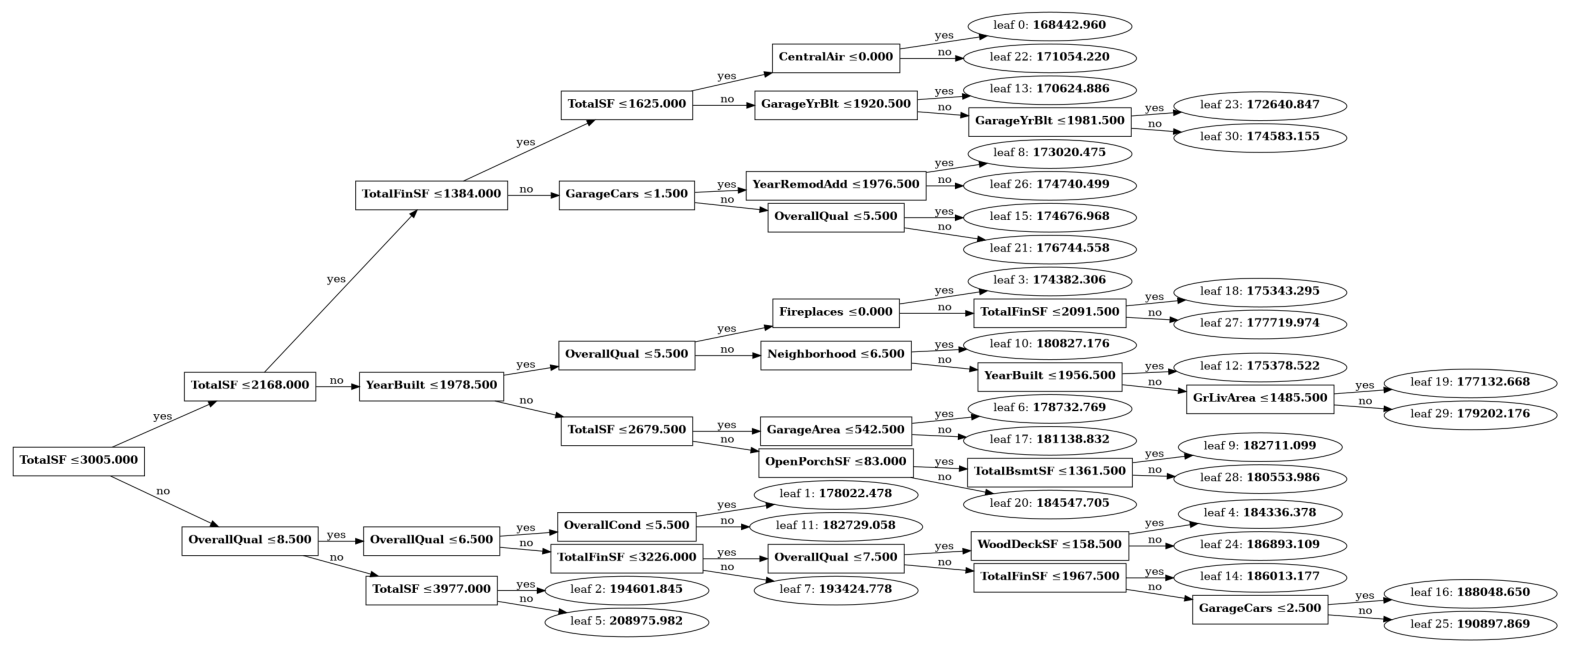

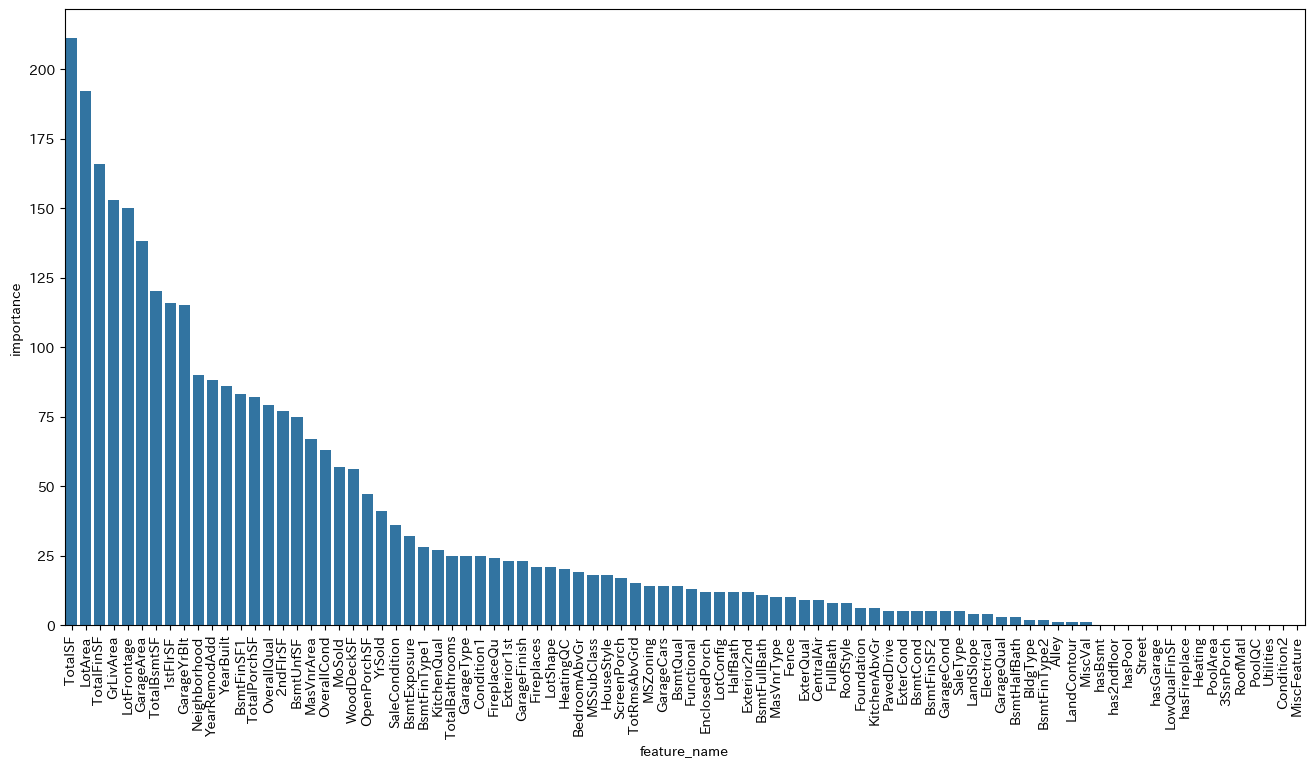

In [64]:
# 学習結果の図示(ここで表示しているのはクロスバリデーションの最後の分割時のモデルについて)
tree_idx = 0
print(f"{tree_idx + 1}番目の木の様子は以下の通り")


plot_tree(model, tree_index=tree_idx, figsize=(20, 10))

# 特徴量重要度
df_feature_importances = pd.DataFrame(
    {"feature_name": model.feature_name_, "importance": model.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(data=df_feature_importances, x="feature_name", y="importance")
plt.xticks(rotation=90)
plt.show()

In [65]:
# 一度このまま提出用のデータを出力
model = LGBMRegressor(max_depth=-1)
model.fit(X, y)
sub_pred = model.predict(df_test)
submission = pd.DataFrame({"Id": df_test_Id, "SalePrice": sub_pred})
submission.to_csv(r"train_test_submission\submission.csv", index=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4157
[LightGBM] [Info] Number of data points in the train set: 1458, number of used features: 82
[LightGBM] [Info] Start training from score 180932.919067
